# 1 Frame the Problem

In [0]:


"For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous dataset."

# 2 Obtain Data

In [4]:
!wget https://www.dropbox.com/s/8grgwn4b6y25frw/titanic.csv

--2018-11-11 15:11:27--  https://www.dropbox.com/s/8grgwn4b6y25frw/titanic.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8grgwn4b6y25frw/titanic.csv [following]
--2018-11-11 15:11:27--  https://www.dropbox.com/s/raw/8grgwn4b6y25frw/titanic.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc39ed95e2a15e3b6ec1037e8c59.dl.dropboxusercontent.com/cd/0/inline/AVUK89BJmGnL8L84jsupEdaurVsje1C6svT7zjU-R6UVxPPnrCk1VnffXPoQe4YAjRdpuwe5d07WW-wkf2GS51UEa6z-gpnnUvI3r8jOeX6ZFXASZDdVqumk0H4mK1zFAX2_yfCJzoFXBLqHnjsGmLT2vUx_qBz5eVrZcNVZ8TzxC0oJ4262ySDujZOqZbSO-QE/file [following]
--2018-11-11 15:11:28--  https://uc39ed95e2a15e3b6ec1037e8c59.dl.dropboxusercontent.com/cd/0/inline/AVUK89BJmGnL8L84jsupEdaurVsje1C6svT7zjU-R6UVxPPnrCk1Vn

In [2]:
!pip install missingno

In [0]:

import matplotlib.pyplot as plt

import missingno as ms

import pandas as pd
import seaborn as sns
import seaborn as sns

%matplotlib inline

# 3 Analyze Data

In [5]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


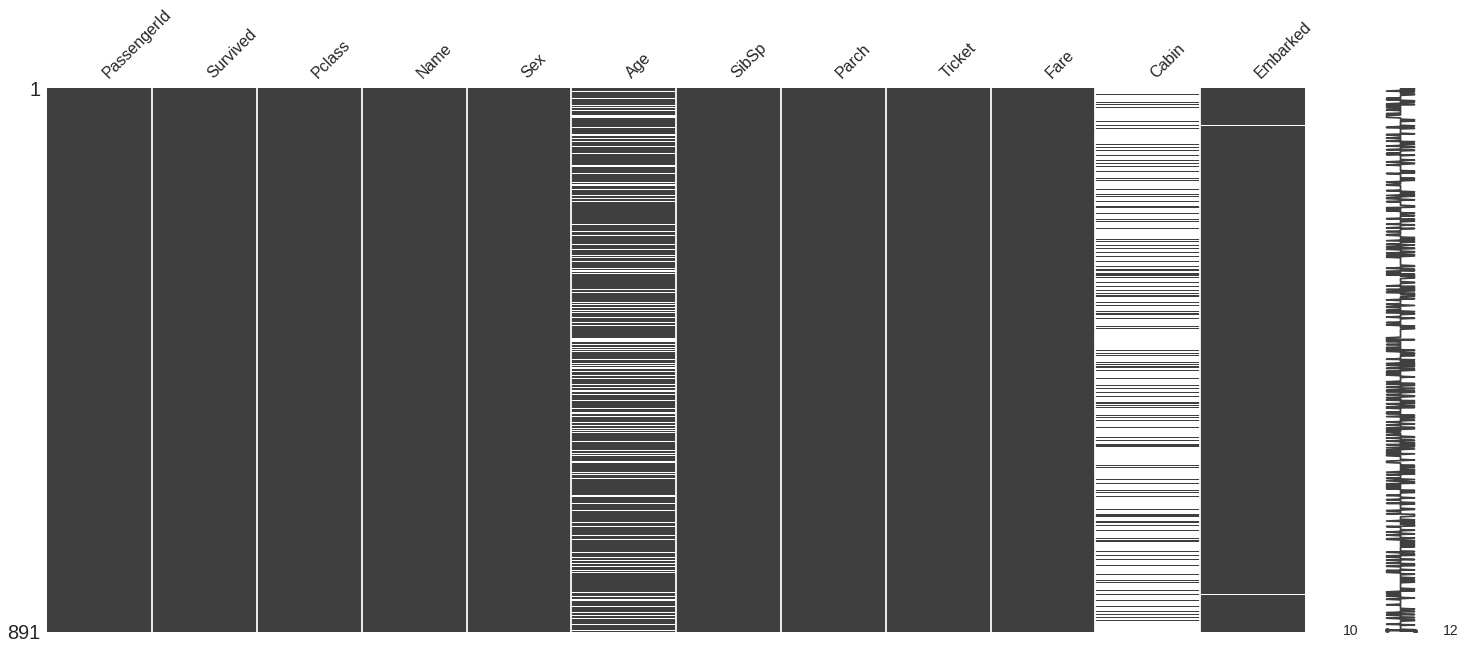

In [6]:

ms.matrix(data)

# 4 Feature Engineering

In [0]:
data.drop('Cabin', axis = 1,inplace=True)

In [0]:
data['Age'].fillna(30,inplace=True)

In [25]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
embark = pd.get_dummies(data['Embarked'],drop_first=1)

In [0]:
sex = pd.get_dummies(data['Sex'],drop_first=1)

In [0]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [0]:
data = pd.concat([data,sex,embark],axis=1)

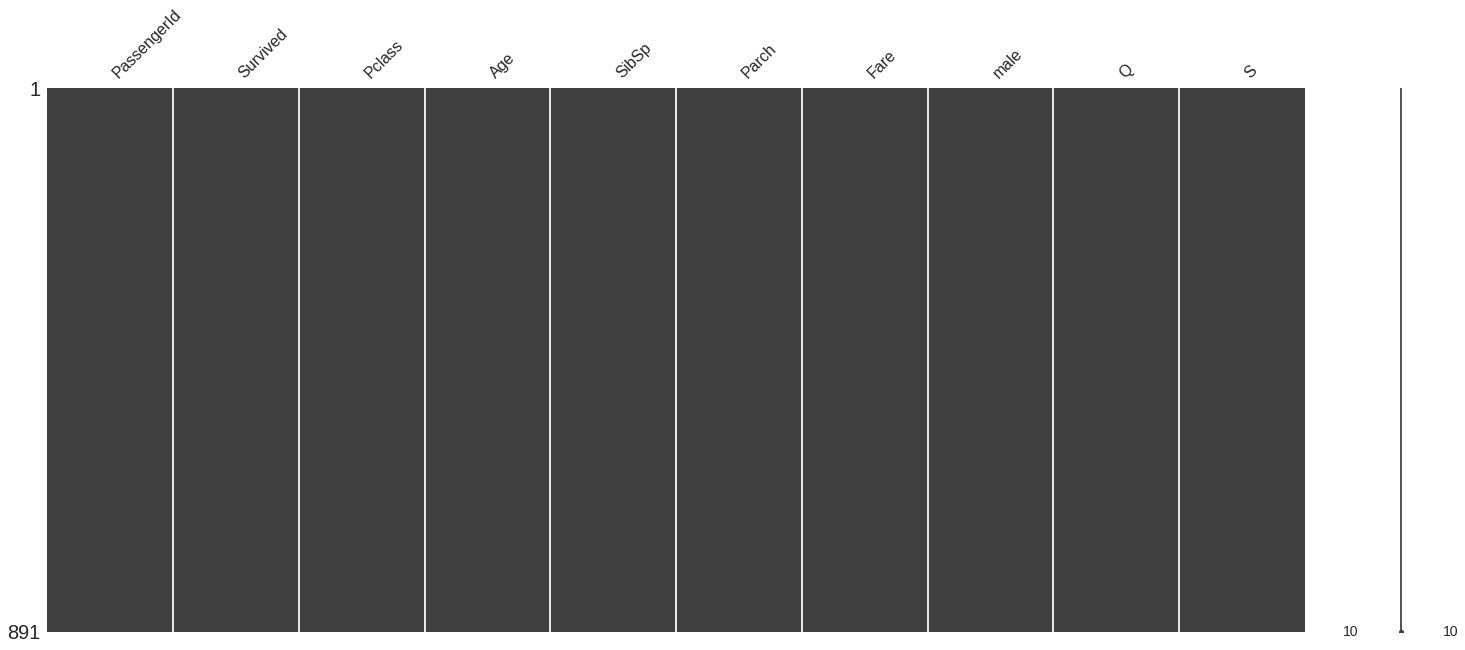

In [30]:
ms.matrix(data)

In [0]:
data.dropna(inplace = True) # do this after taking care of all other missing values

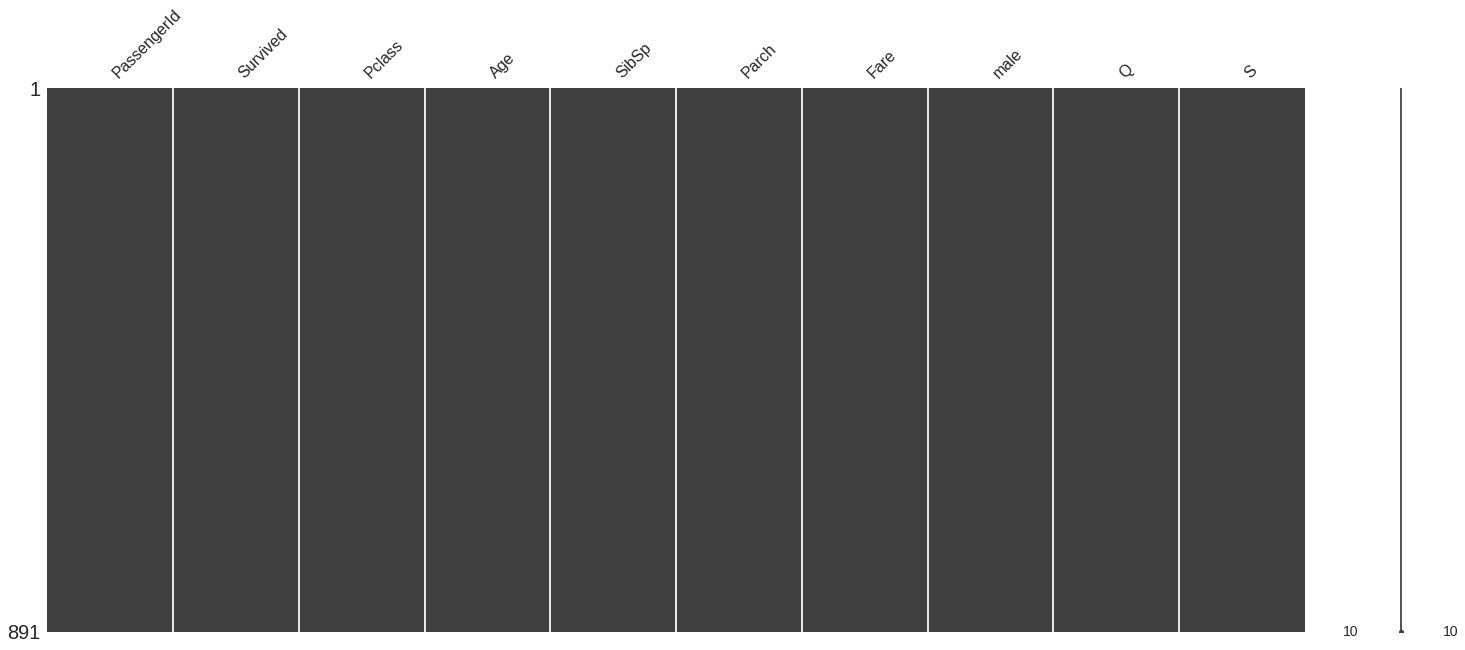

In [32]:
ms.matrix(data)

# 5 Model Selection


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1),  data['Survived'], test_size=0.30, random_state=101)

In [0]:
logmodel = LogisticRegression()

In [36]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
predict =  logmodel.predict(X_test)
print(confusion_matrix(y_test, predict))
print(f1_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

[[134  20]
 [ 41  73]]
0.7053140096618358
0.7849462365591398
0.6403508771929824


In [0]:
df1=pd.DataFrame(predict,columns=['Survived'])

In [0]:
df2=pd.DataFrame(data['PassengerId'],columns=['PassengerId'])

In [40]:
result = pd.concat([df2,df1],axis=1)
result.head()

,PassengerId,Survived
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0


In [0]:
result.to_csv('result.csv',index=False)

In [0]:
from google.colab import files
files.download('result.csv') 